In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVR

In [2]:
#Reading the data
df =pd.read_csv('Turbine_data.csv')

In [3]:
#Getting information about the dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    118224 non-null  object 
 1   ActivePower                   94750 non-null   float64
 2   AmbientTemperatue             93817 non-null   float64
 3   BearingShaftTemperature       62518 non-null   float64
 4   Blade1PitchAngle              41996 non-null   float64
 5   Blade2PitchAngle              41891 non-null   float64
 6   Blade3PitchAngle              41891 non-null   float64
 7   ControlBoxTemperature         62160 non-null   float64
 8   GearboxBearingTemperature     62540 non-null   float64
 9   GearboxOilTemperature         62438 non-null   float64
 10  GeneratorRPM                  62295 non-null   float64
 11  GeneratorWinding1Temperature  62427 non-null   float64
 12  GeneratorWinding2Temperature  62449 non-null

# DATA EXPLORATION

In [4]:
#There are 5 variables, the goal is to try to predict wind power using wind speed and wind direction. data is from the first of january to the 31st of december 2018.
df.head(5)

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [5]:
#Dealing with a lot of missing data.
df.isna().sum()

Unnamed: 0                          0
ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
Blade3PitchAngle                76333
ControlBoxTemperature           56064
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WTG                                 0
WindDirection                   45946
WindSpeed                       23629
dtype: int64

In [6]:
#checking data types
df.dtypes

Unnamed: 0                       object
ActivePower                     float64
AmbientTemperatue               float64
BearingShaftTemperature         float64
Blade1PitchAngle                float64
Blade2PitchAngle                float64
Blade3PitchAngle                float64
ControlBoxTemperature           float64
GearboxBearingTemperature       float64
GearboxOilTemperature           float64
GeneratorRPM                    float64
GeneratorWinding1Temperature    float64
GeneratorWinding2Temperature    float64
HubTemperature                  float64
MainBoxTemperature              float64
NacellePosition                 float64
ReactivePower                   float64
RotorRPM                        float64
TurbineStatus                   float64
WTG                              object
WindDirection                   float64
WindSpeed                       float64
dtype: object

In [7]:
#Getting numerical information about the data
df.describe(include = 'all')

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
count,118224,94750.000000,93817.000000,62518.000000,41996.000000,41891.000000,41891.000000,62160.0,62540.000000,62438.000000,...,62449.000000,62406.000000,62507.000000,72278.000000,94748.000000,62127.000000,6.290800e+04,118224,72278.000000,94595.000000
unique,118224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
top,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118224,NaN,NaN
mean,NaN,619.109805,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,...,71.826659,36.897978,39.547603,196.290539,88.133966,9.907500,2.280429e+03,NaN,196.290539,5.878960
std,NaN,611.275373,4.369145,5.545312,20.644828,20.270465,20.270465,0.0,10.455556,6.323895,...,22.650255,5.178711,5.732783,88.296554,116.596725,4.718421,3.586034e+05,NaN,88.296554,2.619084
min,NaN,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,NaN,0.000000,0.000000
25%,NaN,79.642258,25.627428,39.840247,-0.939849,-0.433264,-0.433264,0.0,57.872242,53.942181,...,54.763998,33.943949,35.812500,145.000000,-0.432137,9.231091,2.000000e+00,NaN,145.000000,3.823330
50%,NaN,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,...,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,NaN,182.000000,5.557765
75%,NaN,1074.591780,31.664772,47.007976,8.099302,8.480194,8.480194,0.0,71.079306,61.305312,...,85.337740,40.008425,43.359375,271.000000,147.359075,13.600413,2.000000e+00,NaN,271.000000,7.506710


In [8]:
#Renaming the date column
df = df.rename({'Unnamed: 0':'Datetime'}, axis = 1)
df['Datetime'] = pd.to_datetime(df['Datetime'],dayfirst = True)

In [9]:
#filling missing data with the median
df.fillna(df.median(),inplace = True)

C:\Users\timak\AppData\Local\Temp/ipykernel_26268/503089618.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.median(),inplace = True)
C:\Users\timak\AppData\Local\Temp/ipykernel_26268/503089618.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(),inplace = True)


In [10]:
#Numerical Information after filling with median values
df.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.0,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,1.182240e+05,118224.000000,118224.000000
mean,576.131539,28.685033,42.963394,3.717605,4.130284,4.130284,0.0,64.517005,57.388925,1112.828712,69.311673,68.608353,36.947947,39.521073,190.736734,77.758507,9.998225,1.214372e+03,190.736734,5.814764
std,554.004562,3.896064,4.032802,13.093631,12.834936,12.834936,0.0,7.610422,4.599345,383.486996,16.776437,16.810500,3.762904,4.168552,69.389261,106.441060,3.421776,2.615875e+05,69.389261,2.346292
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,149.921738,26.350811,42.512424,0.394399,0.888977,0.888977,0.0,64.181922,56.876925,1095.351163,64.597785,63.796541,36.996185,39.157395,172.000000,-0.068410,9.850361,2.000000e+00,172.000000,4.285497
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,182.000000,5.557765
75%,838.515253,30.714347,43.291577,0.394399,0.888977,0.888977,0.0,65.446392,57.500770,1155.511885,67.010176,66.257863,37.312651,39.832760,195.500000,108.893640,10.362055,2.000000e+00,195.500000,6.930121
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


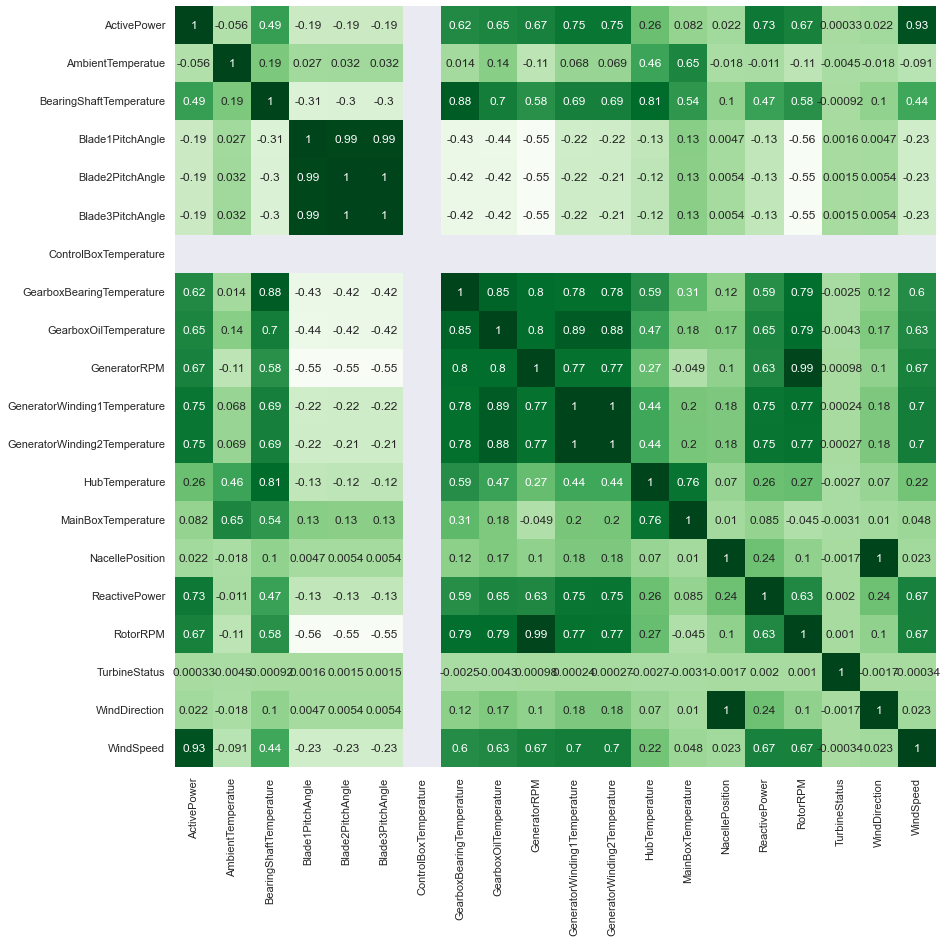

In [11]:
#Correlation matrix between target and features.
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), cbar=False, square= True, annot=True, cmap='Greens')
plt.savefig('correlation matrix1',dpi=300)

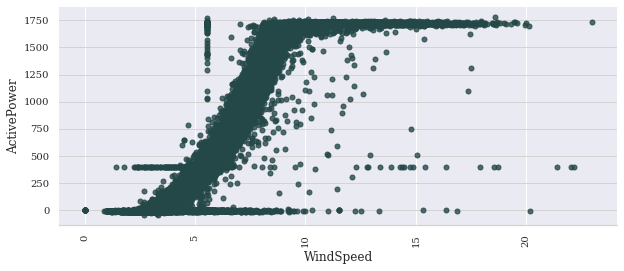

In [12]:
#plot windspeed and Active power
fig, ax = plt.subplots(figsize=(10,4))



# Ax spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.spines['bottom'].set_color('lightgray')

# Grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='lightgray', linestyle='-')

# Plot

plt.scatter(x =df['WindSpeed'] , y = df['ActivePower'] ,color='#244747',s = 25 , alpha = 0.8 )


# Tick control
plt.yticks(fontsize=10, fontfamily='serif',fontweight='light')
#ax.yaxis.set_ticks(np.arange(0,140,10))

plt.xticks(fontsize=10, fontfamily='serif',fontweight='light',rotation=90)


# Label control
ax.set_ylabel('ActivePower',fontfamily='serif',fontsize=12)
ax.set_xlabel('WindSpeed',fontfamily='serif',fontsize=12)


plt.show()

#### The exponential increase is logical as the power gotten from the wind is the cube of the windspeed and power is 0 sometimes assuming the turbine is shut down.

(array([4.1550e+03, 2.9563e+04, 5.4526e+04, 1.9688e+04, 7.3110e+03,
        2.2820e+03, 5.6300e+02, 1.1000e+02, 2.2000e+01, 4.0000e+00]),
 array([ 0.        ,  2.29708931,  4.59417862,  6.89126793,  9.18835724,
        11.48544656, 13.78253587, 16.07962518, 18.37671449, 20.6738038 ,
        22.97089311]),
 <BarContainer object of 10 artists>)

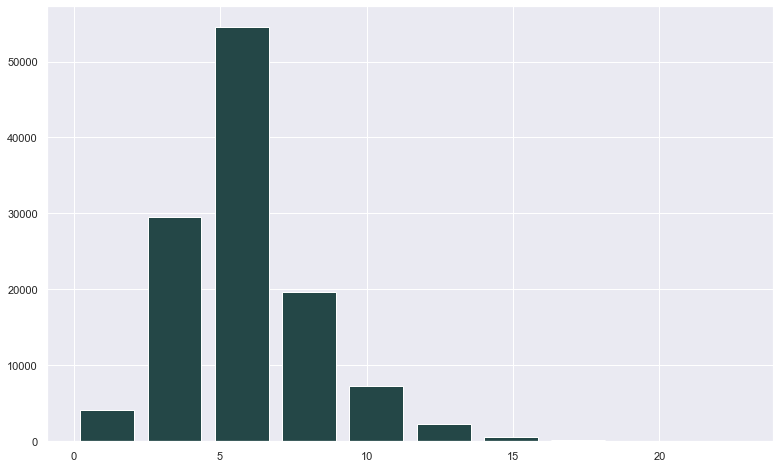

In [13]:
#Distribution of windspeed
plt.rcParams['figure.figsize'] = (13,8)
plt.hist(df.WindSpeed, rwidth = 0.8,color='#244747')

<AxesSubplot:xlabel='RotorRPM', ylabel='ActivePower'>

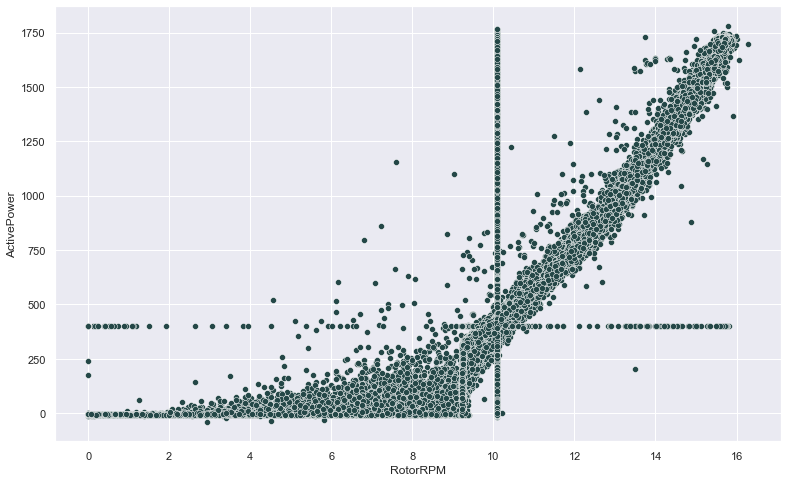

In [14]:
#Scatterplot of RotorRpm and Active Power.
sns.scatterplot( x = df['RotorRPM'], y =df['ActivePower'], color='#244747' )

#### There is an exponential increase in rotor rpm from 10 upwards.

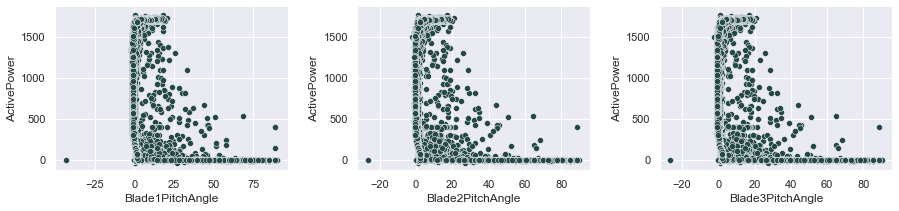

In [15]:
#how does the blade pitch angle affect the output from the data
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3))


ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax1 = sns.scatterplot(x= df["Blade1PitchAngle"], y =df["ActivePower"],color='#244747')

ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax2 = sns.scatterplot(x= df["Blade2PitchAngle"], y =df["ActivePower"],color='#244747')

ax3 = fig.add_subplot(gs[0, 2]) # row 1, span all columns
ax3 = sns.scatterplot(x= df["Blade3PitchAngle"], y =df["ActivePower"],color='#244747')

sns.despine()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None) # useful for adjusting space between subplots


#### In principle, it does make sense that the power output reduces as the bladepitch angle increases as the pitch angle is used to regulate power output and sometimes shut down the turbine

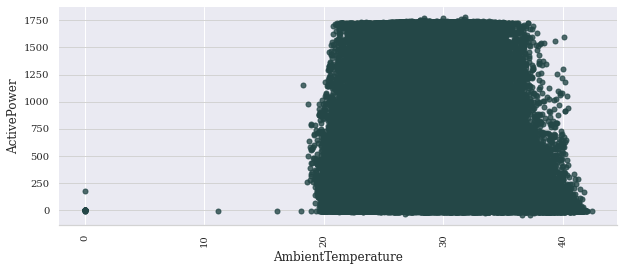

In [16]:
#scatterplot of ambient temperature and Active Power.
fig, ax = plt.subplots(figsize=(10,4))



# Ax spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.spines['bottom'].set_color('lightgray')

# Grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='lightgray', linestyle='-')

# Plot

plt.scatter(x =df['AmbientTemperatue'] , y = df['ActivePower'] ,color='#244747',s = 25 , alpha = 0.8 )


# Tick control
plt.yticks(fontsize=10, fontfamily='serif',fontweight='light')
#ax.yaxis.set_ticks(np.arange(0,140,10))

plt.xticks(fontsize=10, fontfamily='serif',fontweight='light',rotation=90)


# Label control
ax.set_ylabel('ActivePower',fontfamily='serif',fontsize=12)
ax.set_xlabel('AmbientTemperature',fontfamily='serif',fontsize=12)


plt.show()

In [17]:
#Creating a function to put thhe windspeeds into categories
def speed_labels(bins, units):   
    labels = []
    for left, right in zip(bins[:-1], bins[1:]):
        if left == bins[0]:
            labels.append('calm'.format(right))
        elif np.isinf(right):
            labels.append('>{} {}'.format(left, units))
        else:
            labels.append('{} - {} {}'.format(left, right, units))

    return list(labels)

In [18]:
#Converting the wind directions to radians
def _convert_dir(directions, N=None):
    if N is None:
        N = directions.shape[0]
    barDir = directions * np.pi/180. - np.pi/N
    barWidth = 2 * np.pi / N
    return barDir, barWidth

In [19]:
spd_bins = [-1, 0, 5, 10, 15, 20, 25, 30, np.inf]
spd_labels = speed_labels(spd_bins, units='m/s')

dir_bins = np.arange(-7.5, 370, 15)
dir_labels = (dir_bins[:-1] + dir_bins[1:]) / 2

In [20]:
#A count of how many wind speeds are 0
total_count = df.shape[0]
calm_count = df.query("WindSpeed == 0").shape[0]

print('Of {} total observations, {} have calm winds.'.format(total_count, calm_count))

Of 118224 total observations, 13 have calm winds.


In [21]:
rose = (
    df.assign(WindSpd_bins=lambda df:
            pd.cut(df['WindSpeed'], bins=spd_bins, labels=spd_labels, right=True)
         )
        .assign(WindDir_bins=lambda df:
            pd.cut(df['WindDirection'], bins=dir_bins, labels=dir_labels, right=False)
         )
        .replace({'WindDir_bins': {360: 0}})
        .groupby(by=['WindSpd_bins', 'WindDir_bins'])
        .size()
        .unstack(level='WindSpd_bins')
        .fillna(0)
        .assign(calm=lambda df: calm_count / df.shape[0])
        .sort_index(axis=1)
        .applymap(lambda x: x / total_count * 100)
)

In [22]:
#A function that outputs a wind rose plot.
def wind_rose(rosedata, wind_dirs, palette=None):
    if palette is None:
        palette = sns.color_palette('mako', n_colors=rosedata.shape[1])

    bar_dir, bar_width = _convert_dir(wind_dirs)

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    ax.set_theta_direction('clockwise')
    ax.set_theta_zero_location('N')

    for n, (c1, c2) in enumerate(zip(rosedata.columns[:-1], rosedata.columns[1:])):
        if n == 0:
            # first column only
            ax.bar(bar_dir, rosedata[c1].values, 
                   width=bar_width,
                   color=palette[0],
                   edgecolor='none',
                   label=c1,
                   linewidth=0)

        # all other columns
        ax.bar(bar_dir, rosedata[c2].values, 
               width=bar_width, 
               bottom=rosedata.cumsum(axis=1)[c1].values,
               color=palette[n+1],
               edgecolor='none',
               label=c2,
               linewidth=0)

    leg = ax.legend(loc=(0.75, 0.95), ncol=2)
    xtl = ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
    return fig

C:\Users\timak\AppData\Local\Temp/ipykernel_26268/3261197225.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  xtl = ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])


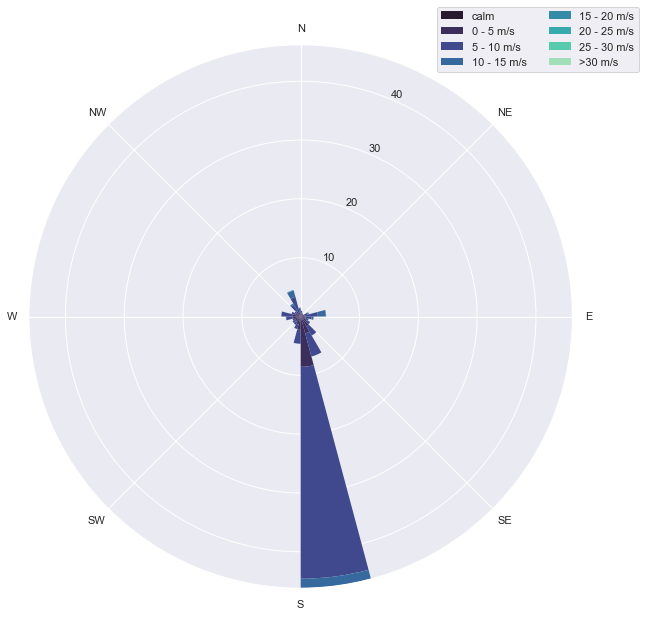

In [23]:
#Plotting the wind rose
directions = np.arange(0, 360, 15)
fig = wind_rose(rose, directions)

### It can be seen that the strongest winds come from the midpoint of the North west (NW) directions.

# checking correlation

In [24]:
df.corr()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
ActivePower,1.000000,-0.056409,0.490565,-0.189658,-0.189884,-0.189884,NaN,0.620292,0.651118,0.672296,0.747722,0.748396,0.262332,0.081656,0.022465,0.726199,0.671704,0.000326,0.022465,0.928757
AmbientTemperatue,-0.056409,1.000000,0.189877,0.027186,0.031619,0.031619,NaN,0.014162,0.136879,-0.109476,0.068057,0.068839,0.457007,0.652884,-0.017589,-0.010548,-0.108513,-0.004463,-0.017589,-0.091444
BearingShaftTemperature,0.490565,0.189877,1.000000,-0.305454,-0.296696,-0.296696,NaN,0.879922,0.701494,0.578098,0.688672,0.687431,0.806627,0.541423,0.100065,0.473615,0.575713,-0.000925,0.100065,0.439675
Blade1PitchAngle,-0.189658,0.027186,-0.305454,1.000000,0.986976,0.986976,NaN,-0.426776,-0.437286,-0.554939,-0.222391,-0.218416,-0.127578,0.131896,0.004726,-0.128429,-0.555242,0.001605,0.004726,-0.226493
Blade2PitchAngle,-0.189884,0.031619,-0.296696,0.986976,1.000000,1.000000,NaN,-0.417933,-0.424631,-0.550843,-0.217258,-0.213438,-0.120671,0.129315,0.005398,-0.127483,-0.551289,0.001490,0.005398,-0.226367
Blade3PitchAngle,-0.189884,0.031619,-0.296696,0.986976,1.000000,1.000000,NaN,-0.417933,-0.424631,-0.550843,-0.217258,-0.213438,-0.120671,0.129315,0.005398,-0.127483,-0.551289,0.001490,0.005398,-0.226367
ControlBoxTemperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GearboxBearingTemperature,0.620292,0.014162,0.879922,-0.426776,-0.417933,-0.417933,NaN,1.000000,0.850767,0.796874,0.783662,0.781912,0.593808,0.306425,0.118264,0.591912,0.793163,-0.002467,0.118264,0.602107
GearboxOilTemperature,0.651118,0.136879,0.701494,-0.437286,-0.424631,-0.424631,NaN,0.850767,1.000000,0.799155,0.887475,0.884899,0.466007,0.177500,0.171215,0.651531,0.794706,-0.004306,0.171215,0.626710
GeneratorRPM,0.672296,-0.109476,0.578098,-0.554939,-0.550843,-0.550843,NaN,0.796874,0.799155,1.000000,0.772037,0.770146,0.273241,-0.049312,0.104209,0.629749,0.992607,0.000983,0.104209,0.669899


#### variables such as Mainboxtemperature, controlboxtemperature, wtg, Nacelle position, Turbine Status, WindDirection do not contribute significantly to the ActivePower output. Whereas, the pitch angle has a negative correlation with the active power.

In [25]:
##Dropping the less useful columns
df.drop(['MainBoxTemperature','TurbineStatus','ControlBoxTemperature','NacellePosition','WindDirection','WTG'], axis = 1, inplace = True)

In [26]:
df

,Datetime,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,ReactivePower,RotorRPM,WindSpeed
0,2017-12-31 00:00:00+00:00,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,35.883659,10.098702,5.557765
1,2017-12-31 00:10:00+00:00,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,35.883659,10.098702,5.557765
2,2017-12-31 00:20:00+00:00,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,35.883659,10.098702,5.557765
3,2017-12-31 00:30:00+00:00,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,35.883659,10.098702,5.557765
4,2017-12-31 00:40:00+00:00,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,35.883659,10.098702,5.557765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118219,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,59.821165,55.193793,1029.870744,59.060367,58.148777,39.008931,13.775785,9.234004,3.533445
118220,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,59.142038,54.798545,1030.160478,58.452003,57.550367,39.006759,8.088928,9.229370,3.261231
118221,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,58.439439,54.380456,1030.137822,58.034071,57.099335,39.003815,4.355978,9.236802,3.331839
118222,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,58.205413,54.079014,1030.178178,57.795387,56.847239,39.003815,12.018077,9.237374,3.284468


### Data Transformation

In [27]:
targets = df['ActivePower']
inputs = df.drop(['ActivePower','Datetime'],axis = 1)

In [28]:
#splitting into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs,targets, test_size = 0.2, random_state = 365)

In [29]:
#Transforming the data and feeding it into the model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([('scaler',StandardScaler()), ('LR', LinearRegression())])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)


0.8918258318459593

In [30]:
#Accuracy of the Linear Regression on the test set
LR = LinearRegression()
LR.fit(x_train,y_train)
LR.score(x_test,y_test)

0.8918258318459595

Text(0, 0.5, 'True Values')

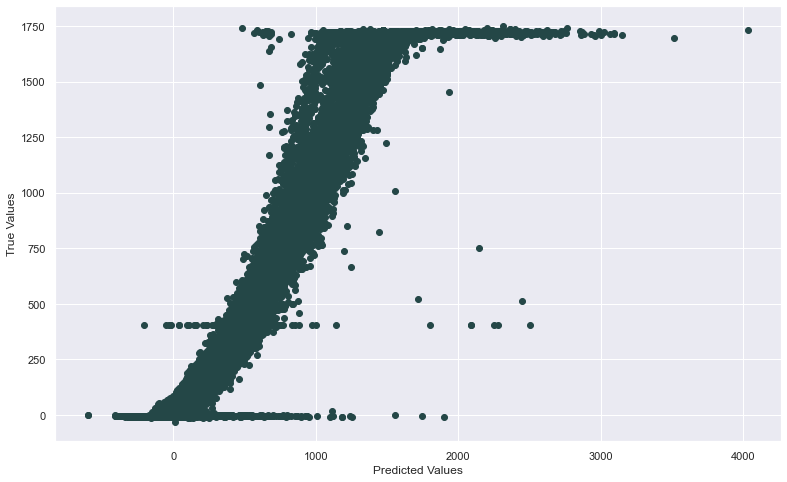

In [31]:
#A scatter plot of the predicted values against the true values.
y_pred1 = LR.predict(x_test)
plt.scatter(y_pred1,y_test, color = '#244747')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

### Using K-fold cross validation

In [32]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state= 365)
cross_val_score(LinearRegression(), inputs,targets,cv=cv)

array([0.89182583, 0.89029648, 0.89112774, 0.89229378, 0.88874118])

## Finding the best model using GridSearchCV

In [41]:
algos = {
        'linear_regression':{
            'model':LinearRegression(),
            'params': {
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
    'Random Forest':{
        'model':RandomForestRegressor(),
            'params':{
                'n_estimators':[1,10],
                'criterion':['mse','mae']
            }
        }
    

    }
    

In [42]:
scores = []
best_estimators = {}
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state=0)
for algo_name, config in algos.items():
        pipe = make_pipeline(StandardScaler(), config['model'])
        gs = GridSearchCV(config['model'], config['params'], cv=cv,return_train_score = True)
        gs.fit(inputs,targets)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        best_estimators[algo_name] = gs.best_estimator_
df1 = pd.DataFrame(scores, columns = ['model','best_score','best_params'])
df1      

C:\Users\timak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 800227527.362233, tolerance: 2900700.9825084503
  model = cd_fast.enet_coordinate_descent(
C:\Users\timak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 388156806.3877356, tolerance: 2899268.681735832
  model = cd_fast.enet_coordinate_descent(
C:\Users\timak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1087443804.8910768, tolerance: 2906190.926426607
  model = cd_fast.enet_coordinate_descent(
C:\Users\timak\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

,model,best_score,best_params
0,linear_regression,0.889568,{'normalize': True}
1,lasso,0.889572,"{'alpha': 1, 'selection': 'random'}"
2,Random Forest,0.995338,"{'criterion': 'mse', 'n_estimators': 10}"


In [35]:
#Fitting of random forest regressor
reg = RandomForestRegressor(n_estimators = 10)
reg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [36]:
#Accuracy of the random forest regressor on the train set
reg.score(x_train,y_train)

0.9991853252308475

In [37]:
#Accuracy of the random forest regressor on the test set
reg.score(x_test,y_test)

0.9951371778130735

Text(0, 0.5, 'True Values')

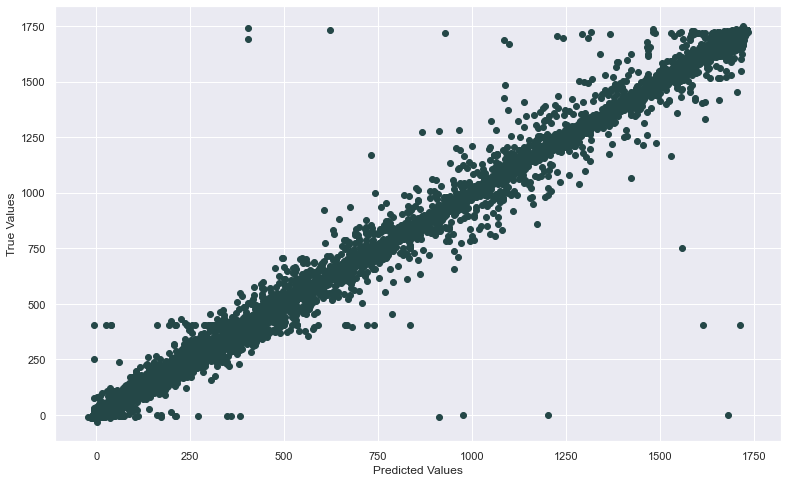

In [38]:
#A scatter plot of the predicted values against the true values.
y_pred = reg.predict(x_test)
plt.scatter(y_pred,y_test, color = '#244747')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

C:\Users\timak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ActivePower', ylabel='Density'>

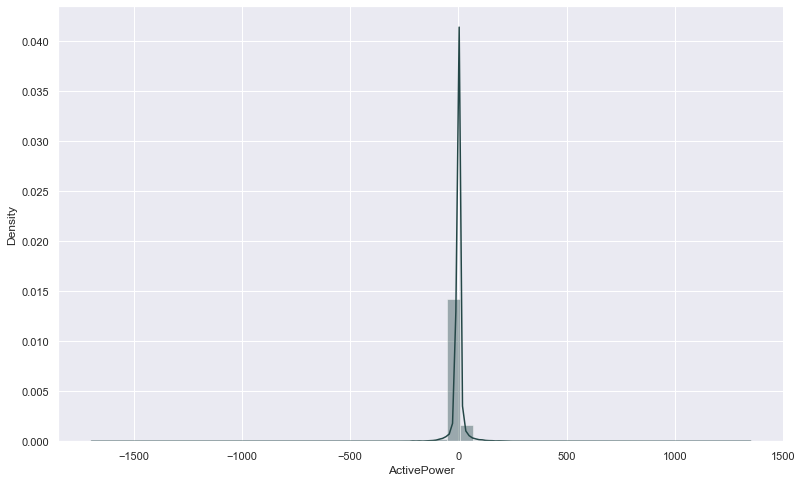

In [39]:
#A distribution of the residual
sns.distplot(y_test-y_pred,color = '#244747')

Feature: 0, Score: 0.00114
Feature: 1, Score: 0.00010
Feature: 2, Score: 0.00015
Feature: 3, Score: 0.00039
Feature: 4, Score: 0.00024
Feature: 5, Score: 0.00032
Feature: 6, Score: 0.00061
Feature: 7, Score: 0.01013
Feature: 8, Score: 0.00034
Feature: 9, Score: 0.00055
Feature: 10, Score: 0.00023
Feature: 11, Score: 0.01618
Feature: 12, Score: 0.01577
Feature: 13, Score: 0.95384


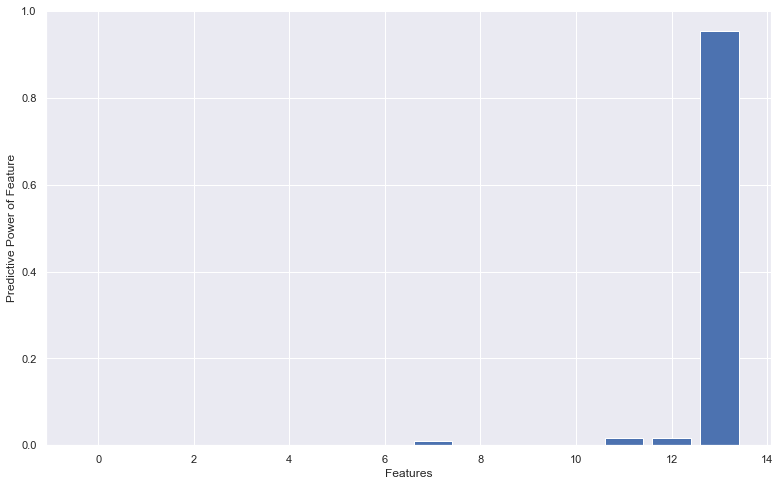

In [40]:
#Which features has the most predictive power.
importance = reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Features')
plt.ylabel('Predictive Power of Feature')
plt.show()